In [1]:
# -------------------------------------------------
# Initial import.
# -------------------------------------------------

import numpy as np
import matplotlib,pylab as plt
import tensorflow as tf
import keras
from scipy.io import loadmat 

from keras.layers import Input, Dense, Activation, Embedding, LSTM, Flatten

from keras.models import Model, Sequential
from keras.utils import np_utils

/home/mlvm2/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
dataset = loadmat('detop_exp01_subj22_Sess1_003.mat')

In [3]:
type(dataset)

dict

In [4]:
dataset

{'__globals__': [],
 '__header__': 'MATLAB 5.0 MAT-file Platform: posix, Created on: Tue Jun  5 19:43:35 2018',
 '__version__': '1.0',
 'channels_emg': array([u'MA1 ', u'MA2 ', u'MA3 ', u'MA4 ', u'MA5 ', u'MA6 ', u'MA7 ',
        u'MA8 ', u'MA9 ', u'MB1 ', u'MB2 ', u'MB3 ', u'MB4 ', u'MB4 ',
        u'MB5 ', u'MB6 ', u'MB7 ', u'MB9 ', u'MC1 ', u'MC2 ', u'MC3 ',
        u'MC4 ', u'MC5 ', u'MC6 ', u'MC7 ', u'MC8 ', u'MC9 ', u'MD1 ',
        u'MD2 ', u'MD3 ', u'MD4 ', u'MD5 ', u'MD6 ', u'MD7 ', u'MD8 ',
        u'MD9 ', u'ME1 ', u'ME2 ', u'ME3 ', u'ME4 ', u'ME5 ', u'ME6 ',
        u'ME7 ', u'ME8 ', u'ME9 ', u'MF1 ', u'MF2 ', u'MF3 ', u'MF4 ',
        u'MF5 ', u'MF6 ', u'MF7 ', u'MF8 ', u'MF9 ', u'MG1 ', u'MG2 ',
        u'MG3 ', u'MG4 ', u'MG5 ', u'MG6 ', u'MG7 ', u'MG8 ', u'MG9 ',
        u'MH1 ', u'MH2 ', u'MH3 ', u'MH4 ', u'MH5 ', u'MH6 ', u'MH7 ',
        u'MH8 ', u'MH9 ', u'MI1 ', u'MI2 ', u'MI3 ', u'MI4 ', u'MI5 ',
        u'MI6 ', u'MI7 ', u'MI8 ', u'MI9 ', u'MJ1 ', u'MJ2 ', u'MJ3 

In [5]:
keys_name = dataset.keys()
keys_name

['emg',
 'fs',
 'channels_glove',
 'channels_emg',
 '__header__',
 'glove',
 '__globals__',
 'session',
 'movement',
 'date',
 '__version__',
 'subject']

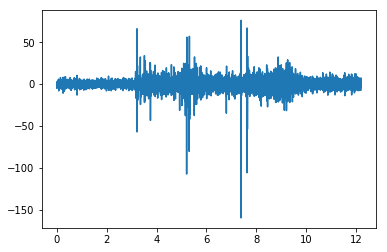

In [6]:
y1 = dataset['glove'][0]
y2 = dataset['emg'][125]
time = np.zeros(len(y1))

for i in range(0, len(y1)):
    time[i] = float(i)/2048

plt.plot(time[0:25000], y2[0:25000])
plt.show()

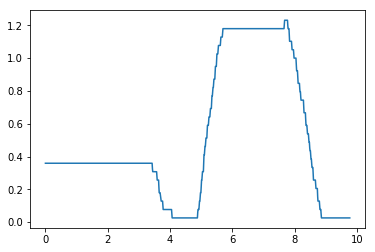

In [7]:
plt.plot(time[0:20000], y1[0:20000])
plt.show()

In [8]:
cutnum = len(y2)%40

y2_cut = np.delete(y2, [len(y1) - cutnum, len(y1)])

y2_process1 = np.zeros(int(len(y2_cut)/10))

for i in range(0, int(len(y2_cut)/10)):
    for j in range(0, 10):
        y2_process1[i] = y2_process1[i] + abs(y2_cut[10*i+j])
        
y2_process1 = y2_process1 / 10

time2 = np.zeros(int(len(y2_cut)/10))

for i in range(0, int(len(y2_cut)/10)):
    time2[i] = i/2048*10

y2_process2 = np.zeros(shape = (int(len(y2_process1)/4), 4))

for i in range(0, int(len(y2_process1)/4)):
    for j in range(0,4):
        y2_process2[i,j] = y2_process1[i*4+j]

y2_process2.shape
#plt.plot(time2, y2_process1)
#plt.show()

/home/mlvm2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  This is separate from the ipykernel package so we can avoid doing imports until


(2639, 4)

In [9]:
y1_cut = np.delete(y1, [len(y1) - cutnum, len(y1)])

y1_process1 = np.zeros(int(len(y1_cut)/40))

for i in range(int(len(y1_cut)/40)):
    y1_process1[i] = y1[i*40]

y1_process2 = y1_process1.copy()
y2_process3 = y2_process2.copy()
cal = 0

for i in range(0, len(y1_process1)):
    if y1_process1[i] > 1 or y1_process1[i] < 0.1:
        y1_process2 = np.delete(y1_process2, i-cal, axis = 0)
        y2_process3 = np.delete(y2_process3, i-cal, axis = 0)
        cal = cal + 1

/home/mlvm2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  """Entry point for launching an IPython kernel.


In [10]:
y2_process3.shape

(450, 4)

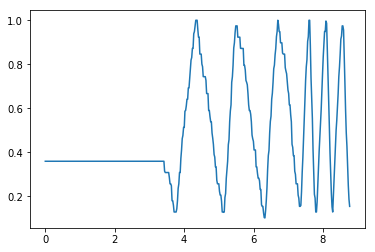

0.358974358974359
[2.00950128 1.79972666 1.60479667 3.9610089 ]


In [11]:
time3 = np.zeros(450)

for i in range(0, 450):
    time3[i] = float(i)/2048*40
    
plt.plot(time3, y1_process2)
plt.show()
print(y1_process2[160])
print(y2_process2[160])

In [12]:
t_s_x = y2_process3
t_s_angles = y1_process2

In [13]:
print(t_s_x)
print(t_s_angles)

[[ 1.56199108  2.10081786  2.25702037  1.32003597]
 [ 1.44017024  1.51988303  1.16753951  1.47571428]
 [ 1.54037463  2.40046962  1.2719951   1.90575008]
 ...
 [15.11826153 11.84701588  9.85129883  4.92296835]
 [ 6.11435119  4.98883636  9.0695022  13.80219326]
 [20.22941581 10.07688294 16.50949239 12.72124331]]
[0.35897436 0.35897436 0.35897436 0.35897436 0.35897436 0.35897436
 0.35897436 0.35897436 0.35897436 0.35897436 0.35897436 0.35897436
 0.35897436 0.35897436 0.35897436 0.35897436 0.35897436 0.35897436
 0.35897436 0.35897436 0.35897436 0.35897436 0.35897436 0.35897436
 0.35897436 0.35897436 0.35897436 0.35897436 0.35897436 0.35897436
 0.35897436 0.35897436 0.35897436 0.35897436 0.35897436 0.35897436
 0.35897436 0.35897436 0.35897436 0.35897436 0.35897436 0.35897436
 0.35897436 0.35897436 0.35897436 0.35897436 0.35897436 0.35897436
 0.35897436 0.35897436 0.35897436 0.35897436 0.35897436 0.35897436
 0.35897436 0.35897436 0.35897436 0.35897436 0.35897436 0.35897436
 0.35897436 0.3589

In [37]:
t_s_x = t_s_x.reshape(-1, 4, 1)
t_s_x

array([[[ 1.56199108],
        [ 2.10081786],
        [ 2.25702037],
        [ 1.32003597]],

       [[ 1.44017024],
        [ 1.51988303],
        [ 1.16753951],
        [ 1.47571428]],

       [[ 1.54037463],
        [ 2.40046962],
        [ 1.2719951 ],
        [ 1.90575008]],

       ...,

       [[15.11826153],
        [11.84701588],
        [ 9.85129883],
        [ 4.92296835]],

       [[ 6.11435119],
        [ 4.98883636],
        [ 9.0695022 ],
        [13.80219326]],

       [[20.22941581],
        [10.07688294],
        [16.50949239],
        [12.72124331]]])

In [38]:
permutation = np.random.permutation(t_s_angles.shape[0])
shuffled_t_s_x = t_s_x[permutation, :]
shuffled_t_s_angles = t_s_angles[permutation]

In [39]:
print(shuffled_t_s_x)
print(shuffled_t_s_angles)

[[[19.51960089]
  [ 5.42518567]
  [11.18844492]
  [ 4.31215302]]

 [[ 2.80245068]
  [16.32068817]
  [21.18400964]
  [13.90982498]]

 [[ 3.85779529]
  [ 9.09250892]
  [12.90200927]
  [ 9.1207107 ]]

 ...

 [[ 5.28046444]
  [11.59798098]
  [ 2.00210183]
  [ 3.41065421]]

 [[ 1.85753196]
  [ 3.45266582]
  [ 2.47663476]
  [ 1.38950664]]

 [[ 2.45498376]
  [ 0.46302781]
  [ 2.01533272]
  [ 2.78636963]]]
[0.19165918 0.35897436 0.42631834 0.35897436 0.53846154 0.94391026
 0.84615385 0.35897436 0.33333333 0.35897436 0.35897436 0.12820513
 0.35897436 0.45656625 0.35897436 0.92307692 0.35897436 0.35897436
 0.8974359  0.35897436 0.41025641 0.33333333 0.72533023 0.71794872
 0.35897436 0.87179487 0.58974359 0.54582237 0.35897436 0.66666667
 0.35897436 0.57251757 0.30769231 0.34873745 0.38461538 0.83258505
 0.94871795 0.35897436 0.64102564 0.84615385 0.1025641  0.35897436
 0.35897436 0.84272852 0.48717949 0.66548777 0.84615385 0.35897436
 0.35897436 0.35897436 0.25641026 0.35897436 0.23076923 0.3589

In [27]:
# -------------------------------------------------
# Global Parameters Declaration.
# -------------------------------------------------

BATCH_SIZE = 1 # Batch size, wait for data pre-processing finished.
MAX_STEPS = 4 # Maximum length of one sample (time-series data), wait for data pre-processing finished.
ITERS = 1 # How many generator iterations to train for, wait for data pre-processing finished.
LR = 0.1 # Learning rate, COPY from origin programe.
Timeseries_features = 1 # Time-series feature size,if only use average value per 50ms then it would be 1.
                       # However, considering about the possibility of using sEMG image, it could be much more larger.
NUM_ANGLES = 0 # Numbers of angles, depends on how exact i want, wait for data pre-processing finished.
LSTM_UNIT = 4 # Numbers of LSTM unit, depends on how many steps i want,wait for data pre-processing.

In [14]:
# -------------------------------------------------
# Dividing Training Data and Testing Data.
# Wait for data pre-processing finished.
# -------------------------------------------------

train_t_s_x = t_s_x[0:405]
train_t_s_angles = t_s_angles[0:405]
test_t_s_x = t_s_x[405:]
test_t_s_angles = t_s_angles[405:]

print(train_t_s_x.shape)
print(train_t_s_angles.shape)
print(test_t_s_x.shape)
print(test_t_s_angles.shape)

(405, 4)
(405,)
(45, 4)
(45,)


In [41]:
test_t_s_x

array([[[18.9866224 ],
        [37.16586094],
        [13.63514509],
        [ 7.38550161]],

       [[ 8.35547366],
        [ 2.87756333],
        [ 2.43185412],
        [25.14403189]],

       [[ 8.6588334 ],
        [ 7.2582818 ],
        [ 8.06606468],
        [ 2.10723566]],

       [[ 8.69311796],
        [24.57414019],
        [24.55335339],
        [19.96110841]],

       [[ 1.89474627],
        [ 1.71763837],
        [ 2.02976089],
        [ 2.51308577]],

       [[ 1.43396493],
        [ 2.4340262 ],
        [ 1.82553972],
        [12.13797855]],

       [[ 3.68940641],
        [ 9.9033413 ],
        [18.36520201],
        [ 8.00041346]],

       [[ 4.62823649],
        [ 6.00599775],
        [ 1.56813144],
        [ 2.7087709 ]],

       [[ 1.10303838],
        [ 4.14208076],
        [ 6.81225069],
        [10.33859676]],

       [[15.91192951],
        [ 5.36688374],
        [ 9.44395271],
        [15.1601904 ]],

       [[ 3.7891077 ],
        [ 3.05410321],
        [ 8.11

In [41]:
tf.reset_default_graph()

# -------------------------------------------------
# T-S RNN Structrue.
# -------------------------------------------------

W_1 = tf.Variable(tf.random_normal([LSTM_UNIT, 1]))
#bias1 = tf.Variable(tf.constant(0.1, shape = [1, ]))
bias1 = tf.Variable(tf.zeros(1))
W_2 = tf.Variable(tf.random_normal([LSTM_UNIT, 1]))
bias2 = tf.Variable(tf.constant(0.1, shape = [1, ]))

def TSRNN(t_s_input):
    
    t_s_input = tf.reshape(t_s_input, [-1, MAX_STEPS, Timeseries_features])
    
    print(t_s_input.shape)
    
    cell = tf.contrib.rnn.BasicLSTMCell(LSTM_UNIT)
    init_state = cell.zero_state(BATCH_SIZE, tf.float32)
    lstm_output, final_state = tf.nn.dynamic_rnn(cell, t_s_input, initial_state=init_state)
    
    print(lstm_output.shape)
    print(final_state)
    
    lstm_output = tf.reshape(lstm_output, [-1, LSTM_UNIT])
    
    print(lstm_output.shape)
    
    pred_angle = tf.matmul(lstm_output, W_1) + bias1 # tanh?
    
    pred_angle = tf.reshape(pred_angle, [-1, LSTM_UNIT])
    
    pred_angle = tf.tanh(tf.matmul(pred_angle, W_2) +bias2)
    
    print(pred_angle.shape, )
    
    return pred_angle

# -------------------------------------------------
# T-S RNN Model Training.
# -------------------------------------------------

def Train_TSRNN():
    # Place Holder before training the nets.
    t_s_X = tf.placeholder(tf.float32, shape = [MAX_STEPS])
    t_s_Y = tf.placeholder(tf.float32, shape = []) # Not sure it is correct?
    
    train_data = train_t_s_x
    train_label = train_t_s_angles
    
    pred =  TSRNN(t_s_X)
    
    loss = tf.square(pred - t_s_Y)
    train_op = tf.train.AdamOptimizer(LR).minimize(loss) # optimizer?
    
    #train_op = tf.train.RMSPropOptimizer(learning_rate=LR).minimize(loss)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
    
        for i in range(0, 2400):
            _, loss_currency = sess.run([loss, train_op], feed_dict={t_s_X: train_data[i], t_s_Y: train_label[i]})
            
            print(loss_currency)

In [42]:
Train_TSRNN()

(1, 4, 1)
(1, 4, 4)
LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_3:0' shape=(1, 4) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_4:0' shape=(1, 4) dtype=float32>)
(4, 4)
(TensorShape([Dimension(1), Dimension(1)]),)
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
No

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


In [15]:
# --------------------------------------------------------
# keras model.
# --------------------------------------------------------

model = Sequential()
model.add(LSTM(4, input_shape = (4, 1), kernel_regularizer = keras.regularizers.l2(0.01)))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')


In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [18]:
train_t_s_x = train_t_s_x.reshape(-1, 4, 1)
test_t_s_x = test_t_s_x.reshape(-1, 4, 1)

In [19]:
model.fit(train_t_s_x, train_t_s_angles, epochs = 40, batch_size = 10, verbose = 2)

Epoch 1/40
 - 2s - loss: 0.2383
Epoch 2/40
 - 1s - loss: 0.1406
Epoch 3/40
 - 1s - loss: 0.0893
Epoch 4/40
 - 1s - loss: 0.0696
Epoch 5/40
 - 1s - loss: 0.0634
Epoch 6/40
 - 1s - loss: 0.0608
Epoch 7/40
 - 1s - loss: 0.0591
Epoch 8/40
 - 1s - loss: 0.0578
Epoch 9/40
 - 1s - loss: 0.0566
Epoch 10/40
 - 1s - loss: 0.0558
Epoch 11/40
 - 1s - loss: 0.0551
Epoch 12/40
 - 1s - loss: 0.0544
Epoch 13/40
 - 1s - loss: 0.0538
Epoch 14/40
 - 1s - loss: 0.0533
Epoch 15/40
 - 1s - loss: 0.0529
Epoch 16/40
 - 1s - loss: 0.0525
Epoch 17/40
 - 1s - loss: 0.0521
Epoch 18/40
 - 1s - loss: 0.0516
Epoch 19/40
 - 1s - loss: 0.0516
Epoch 20/40
 - 1s - loss: 0.0510
Epoch 21/40
 - 1s - loss: 0.0511
Epoch 22/40
 - 1s - loss: 0.0504
Epoch 23/40
 - 1s - loss: 0.0502
Epoch 24/40
 - 1s - loss: 0.0499
Epoch 25/40
 - 1s - loss: 0.0496
Epoch 26/40
 - 1s - loss: 0.0494
Epoch 27/40
 - 1s - loss: 0.0494
Epoch 28/40
 - 1s - loss: 0.0492
Epoch 29/40
 - 1s - loss: 0.0488
Epoch 30/40
 - 1s - loss: 0.0488
Epoch 31/40
 - 1s -

In [20]:
test_prediction = model.predict(test_t_s_x)
report = model.predict(test_t_s_x)

In [21]:
test_prediction = test_prediction.reshape(45)
print(test_prediction)

[0.504848   0.5013266  0.51194626 0.48415464 0.50767666 0.5274024
 0.51377803 0.4992097  0.52393556 0.45511317 0.5057726  0.44383377
 0.4579872  0.43245375 0.49972433 0.5032892  0.43607664 0.41644144
 0.3783198  0.5037257  0.52362967 0.5063862  0.50099134 0.3942207
 0.51103854 0.48032725 0.5302723  0.52376515 0.5031456  0.4005475
 0.5239225  0.5032925  0.52353823 0.4430431  0.47516513 0.45717633
 0.4745105  0.49142474 0.44211084 0.5169076  0.44332743 0.48843658
 0.46367788 0.4404984  0.37952542]


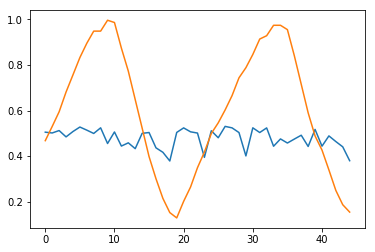

In [22]:
time_test = np.zeros(45)

for i in range(0, 45):
    time_test[i] = i

time_test = time_test[0:45]
test_prediction = test_prediction[0:45]

plt.plot(time_test, test_prediction, time_test, test_t_s_angles[0:45])
plt.show()